In [26]:
import pandas as pd

df = pd.read_csv('T1D_GWAS.tsv', sep='\t') # Make the table readable using pandas

# -log the P-values and column to the table
df['-logp']= - np.log(df['P-VALUE'])

# Put variants in order by max position in chromosome
running_pos = 0 # moves all integers down so first pos is 0
 
cumulative_pos = [] # create list of new series for position in whole genome

for chrom, group_df in df.groupby('CHR_ID'): # Group the region in each chromosome together
    cumulative_pos.append(group_df['CHR_POS'] + running_pos) 
    running_pos+= group_df['CHR_POS'].max() #tells us the last position in each chromosome
    
df['cumulative_pos'] = pd.concat(cumulative_pos) # Position of variant relative to whole chromosome, add column to the table

import seaborn as sns
%matplotlib inline

Text(0.5, 0.98, 'GWAS Plot showing Association between SNPs in T1DM')

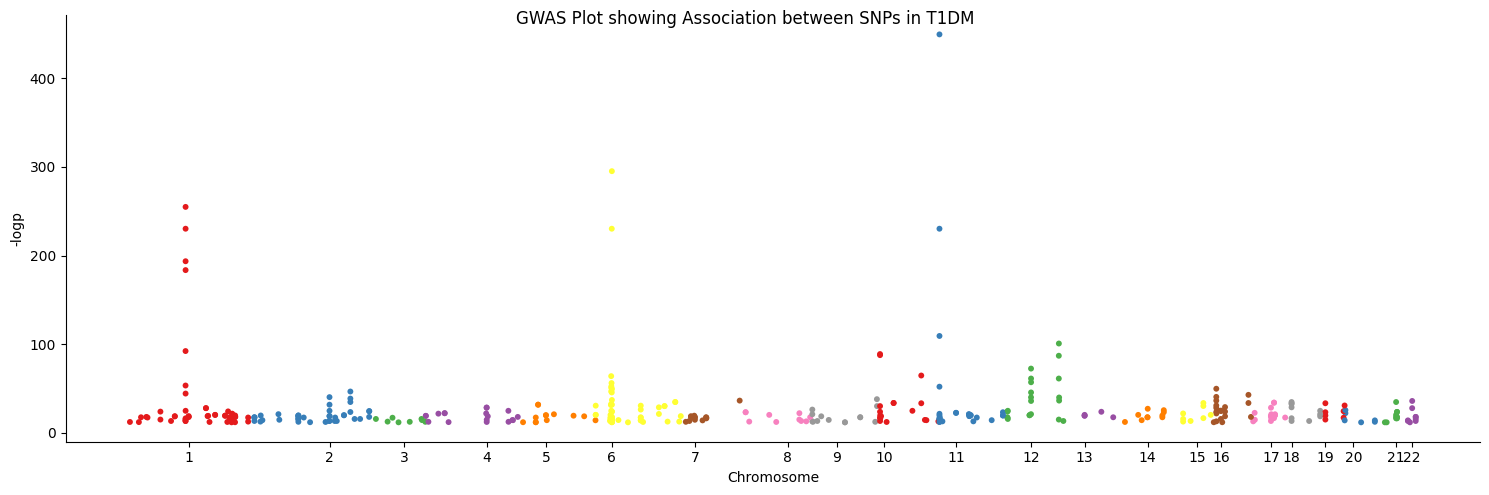

In [27]:
my_data = df.sample(390)

g=sns.relplot(
    data = my_data, # for whole genome this number will be 10000, or however many you want to see
    x= 'cumulative_pos',
    y= '-logp',
    aspect = 3, # for whole genome this will need to be tweaked to maybe 4
    hue = 'CHR_ID', # for whole genome this will be changed to 'CHR' -chromosome
    palette= 'Set1', #random colour scheme, can be changed to any colour(s)
    linewidth=0,
    size=4,
    legend=None
)

# Editing x-axis and making it neater
g.ax.set_xlabel('Chromosome') # x-axis label

# Setting where the labels in the x-axis should be
g.ax.set_xticks(df.groupby('CHR_ID')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR_ID'].unique())


# Add title to graph
g.fig.suptitle('GWAS Plot showing Association between SNPs in T1DM')

# Create annotations for each SNP point
#annotations = my_data[my_data['-logp'] > 20].apply(lambda p : g.ax.annotate(p['SNPS'], (p['cumulative_pos'], p['-logp'])), axis=1).to_list()

#adjust_text(annotations, arrowprops = {'arrowstyle': '->', 'color':'blue'})